<table align="left">
  <td>
    <a href="https://colab.research.google.com/drive/1rSxaLafk_2bIWjTpEW5u2V8VeCbpjRTn?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

**Importing all the necessary libraries**

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

**Download iris dataset from sklearn**

In [59]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df['label'] = df.target.replace(dict(enumerate(data.target_names)))

In [60]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


**Checking the correlation between each feature**

Text(0.5, 1.0, 'Correlation of iris classes')

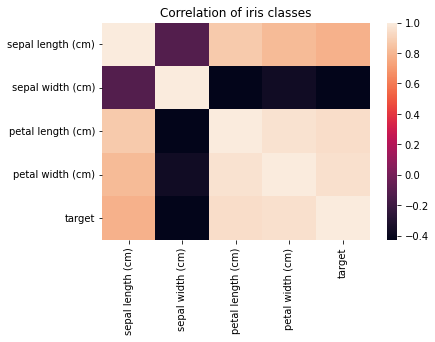

In [61]:
plt.figure(1)
sns.heatmap(df.corr())
plt.title("Correlation of iris classes") 
# shows correlation between and all features

In [62]:
df.describe() # statistical summary for the given dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Checking for null values** 

In [63]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
label                0
dtype: int64

In [64]:
''' Removing duplicates '''
df = df.drop_duplicates()

In [65]:
''' Distribution of each class is found '''
df.value_counts('label')

label
versicolor    50
setosa        50
virginica     49
dtype: int64

"The plot below shows that 'Setosa' has smaller petal length and petal width\nThe 'Versicolor' lies in the middle with petal length(3 - 5 cm) and petal width (1 - 1.5 cm)\nThe 'Viginica' has larger petal length and petal width\n"

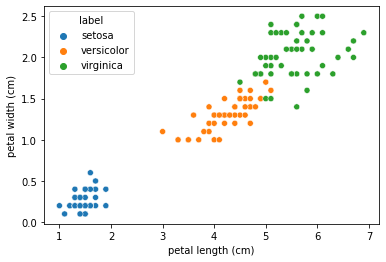

In [66]:
''' Comparing petal length with petal width '''
sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', hue = 'label', data = df)
'''The plot below shows that 'Setosa' has smaller petal length and petal width
The 'Versicolor' lies in the middle with petal length(3 - 5 cm) and petal width (1 - 1.5 cm)
The 'Viginica' has larger petal length and petal width
'''

"The plot below shows that 'Setosa' has lower sepal length but higher sepal width\nIts harder to comment about the other species\n"

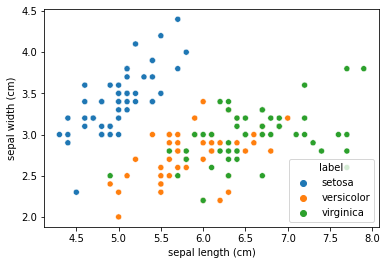

In [67]:
''' Comparing sepal length with sepal width '''
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'label', data = df )
'''The plot below shows that 'Setosa' has lower sepal length but higher sepal width
Its harder to comment about the other species
'''

**Data Standardisation**

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data.

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
'''Dataset is split into X and y (input and output respectively)'''
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df.target


print(X.shape[0], y.shape[0])

149 149


In [69]:
'''Applying standard scaling on features'''
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


**Splitting dataset into training set and testing set for better generalisation**

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**SVM classification**

In [71]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)
print("Accuracy on training {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on testing {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on training 0.97
Accuracy on testing 1.00


**Root mean squared Error (RMSE) is used to compute the error**

In [72]:
from sklearn import metrics
from math import sqrt
y_pred = clf.predict(X_test)
rmse = sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE: ", rmse)

RMSE:  0.0


**Cross validation**

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv = 5)
print(scores)

[0.96666667 0.96666667 0.96666667 0.9        1.        ]


**Tune SVM hyperparameters by using GridSearchCV**

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(clf, param_grid, verbose = 2, cv = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .................................... C=10, gamma=1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .................................. C=10, gamma=0.1, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [77]:
grid_pred = grid.predict(X_test)

In [78]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [79]:
rmse_grid = sqrt(metrics.mean_squared_error(y_test,grid_pred))
print('RMSE on GridSearchCV:', rmse_grid)

RMSE on GridSearchCV: 0.0


In [80]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.001}


In [81]:
print(grid.best_estimator_)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Hyperparameter value for C: 1000

Hyperparameter value for gamma: 0.001

Accuracy on training 0.97

Accuracy on testing 1.00 

# KNN classification

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 9)
knn_clf.fit(X_train, y_train)
print("Accuracy on training {:.2f}".format(knn_clf.score(X_train, y_train)))
print("Accuracy on testing {:.2f}".format(knn_clf.score(X_test, y_test)))

Accuracy on training 0.97
Accuracy on testing 1.00


In [83]:
y_pred_knn=knn_clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_knn))

1.0


In [84]:
scores_knn = cross_val_score(knn_clf, X, y, cv = 5, scoring='accuracy')
print(scores_knn.mean())

0.9733333333333334


In [85]:
from sklearn.model_selection import RandomizedSearchCV
k_range = list(range(1,31))
param_grid_knn = dict(n_neighbors = k_range)
print(param_grid_knn)
options = ['uniiform', 'distance']
random_search = RandomizedSearchCV(knn_clf, param_grid_knn, cv = 10, scoring = 'accuracy', random_state=42)
random_search.fit(X_train, y_train)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=9,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29, 30]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
     

In [86]:
print(random_search.best_score_)

0.9659090909090908


In [87]:
print(random_search.best_params_)

{'n_neighbors': 16}


Best k-value: 16

Accuracy: 0.965